In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# @Time    : 18-12-6 下午3:56
# @Author  : ManWingloeng
# @Site    : 

# @File    : testycrcb.py
# @Software: readingbook

import cv2
# from imutils.video.webcamvideostream import WebcamVideoStream
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

frame = cv2.imread("/media/todd/38714CA0C89E958E/147/yl_tmp/readingbook/data/all_nail/test/09.jpg")
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# frame=cv2.blur(frame,(11,11))
frame = imutils.resize(frame, width=500, height=500)
img = frame.copy()
frame = cv2.GaussianBlur(frame, (15, 15), 0)
frame = cv2.bilateralFilter(frame, 9, 75, 100)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
YCrCb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
print(frame.shape[:2])
mask = cv2.inRange(YCrCb_frame, np.array([0, 135, 97]), np.array([255, 177, 130]))
ret, bin_mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
init_mask = bin_mask.copy()
# cv2.imshow("init_mask", init_mask)

# mask_frame=frame[:,:,1:]
# mask=np.ones(shape=mask_frame.shape)
# msk_lower=np.array([136, 100]) #140,100 136
# msk_upper=np.array([175, 120]) #175,120
# print("mask: ",mask.shape)
# print("mask_frame: ",mask_                    frame.shape)
# np.putmask(mask, mask_frame<msk_lower, 0.)
# np.putmask(mask, mask_frame>msk_upper, 0.)

# mask=mask[:,:,0]*mask[:,:,1]
# print(mask.shape)

# kernelf = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernelf, iterations=1)
# mask = cv2.dilate(mask, kernelf, iterations=1)
# mask = cv2.erode(mask, kernelf, iterations=1)



bin_mask = cv2.morphologyEx(bin_mask, cv2.MORPH_CLOSE, (11, 11))
watershed_mask = bin_mask.copy()
bin_mask = cv2.dilate(bin_mask, (15, 15), iterations=4)
bin_mask = cv2.erode(bin_mask, (15, 15), iterations=2)

# bin_mask = cv2.medianBlur(bin_mask, 3)

### watershed
kernel = np.ones((3, 3), np.uint8)
fg = cv2.erode(watershed_mask, kernel, iterations=3)
# cv2.imshow("fg", fg)
bg = cv2.dilate(watershed_mask, kernel, iterations=4)
bg = cv2.dilate(bg, (15, 15), iterations=4)
# cv2.imshow("bg", bg)
ret, bg_bin = cv2.threshold(bg, 1, 128, cv2.THRESH_BINARY_INV)
# cv2.imshow("bg_bin", bg_bin)

markers = fg + bg_bin
# cv2.imshow("markers", markers)

markers = markers.astype(np.int32)
markers = cv2.watershed(img, markers)
# img[markers == -1] = [255, 0, 0]
# cv2.imshow("water_img", img)q

_, contours, _ = cv2.findContours(bin_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cmax = max(contours, key=cv2.contourArea)

# epsilon = 0.000001*cv2.arcLength(cmax,True)
# cmax = cv2.approxPolyDP(cmax,epsilon,True)
cv2.drawContours(frame, [cmax], 0, (55, 55, 251), 1)  # red
cv2.drawContours(img, [cmax], 0, (55, 55, 251), 1)  # red

(666, 500)


array([[[185, 189, 183],
        [186, 190, 184],
        [186, 190, 184],
        ...,
        [ 63,  62,  63],
        [ 57,  60,  62],
        [ 53,  57,  55]],

       [[186, 190, 184],
        [186, 190, 184],
        [186, 190, 184],
        ...,
        [ 58,  56,  56],
        [ 54,  56,  55],
        [ 50,  48,  46]],

       [[188, 190, 184],
        [188, 190, 184],
        [188, 191, 184],
        ...,
        [ 44,  45,  43],
        [ 47,  46,  42],
        [ 49,  46,  31]],

       ...,

       [[125, 143, 144],
        [125, 143, 144],
        [124, 142, 143],
        ...,
        [ 60,  49,  37],
        [ 44,  32,  23],
        [ 60,  45,  34]],

       [[124, 142, 143],
        [124, 142, 143],
        [125, 141, 143],
        ...,
        [ 52,  40,  27],
        [ 55,  42,  31],
        [ 51,  41,  29]],

       [[125, 143, 144],
        [128, 143, 145],
        [127, 142, 144],
        ...,
        [ 52,  39,  28],
        [ 51,  40,  28],
        [ 44,  37,  26]]

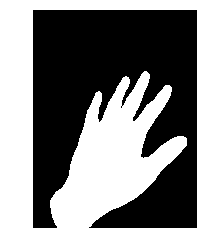

c_x: 244,c_y: 450
size_of_contours 1079
Threshold 215
point: [228 290]
point: [108 506]
point: [353 447]


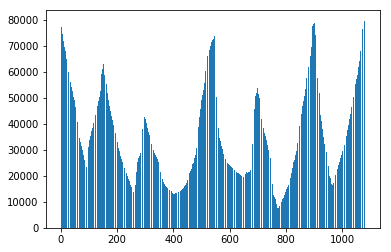

finger_Candidate [array([228, 290], dtype=int32), array([108, 506], dtype=int32), array([353, 447], dtype=int32)]
distances [78194, 77480, 77293, 76585, 76402, 75002, 74485, 73105, 72594, 71912, 71405, 70729, 70226, 69556, 69057, 68393, 67898, 66586, 66097, 65449, 64964, 63684, 63205, 61945, 61472, 60850, 60381, 59765, 59300, 58690, 58229, 57625, 57168, 56570, 56117, 55525, 55076, 54490, 54045, 53465, 53024, 52450, 52013, 51445, 51012, 50450, 50021, 49465, 49040, 47944, 47525, 46985, 46570, 45506, 45097, 44573, 44168, 42626, 42229, 40729, 40340, 38404, 38025, 36621, 36250, 34888, 34525, 34081, 33722, 33284, 32929, 32497, 31797, 31373, 31028, 30610, 30269, 29857, 29185, 28381, 28052, 26882, 26561, 26181, 26122, 25490, 24754, 24138, 23780, 23477, 23125, 23377, 25540, 25906, 27194, 27572, 29237, 29629, 31005, 31409, 32468, 32882, 33602, 34024, 34756, 35186, 35930, 36368, 36745, 37189, 37570, 38020, 38405, 38861, 39250, 39712, 40105, 40573, 40970, 41444, 41845, 42325, 42730, 43216, 43625, 

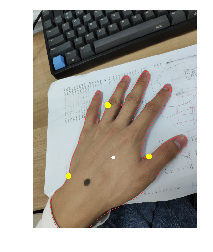

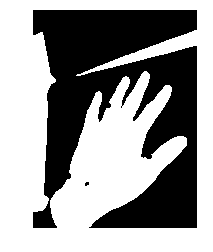

In [2]:
def gravity(image, mask, contours):
    # print("countours 0",contours)
    only_hand = np.zeros(shape=gray.shape)
    # save_zeros = save_zeros.astype(np.int32)
    cv2.drawContours(only_hand, [contours], 0, 255, cv2.FILLED)
#     cv2.imshow("only_hand",only_hand)
    plt.imshow(only_hand, cmap=plt.cm.gray)
    plt.axis("off")
    plt.show()
    moments = cv2.moments(contours)
    m00 = moments['m00']

    c_x, c_y = None, None
    if m00 != 0:
        c_x = int(moments['m10'] / m00)  # Take X coordinate
        c_y = int(moments['m01'] / m00)  # Take Y coordinate
    print("c_x: {},c_y: {}".format(c_x, c_y))
    ctr = (-1, -1)
    if c_x != None and c_y != None:
        ctr = (c_x, c_y)
        # Put black circle in at centroid in image
        cv2.circle(image, ctr, 5, (255, 255, 255), -1)
        # cv2.circle(bin_mask, ctr, 5, (255, 255, 255), -1)
    # print("contours",len(contours), contours[1].shape)
    # print(contours)
    dist = lambda p: (p[0] - c_x) ** 2 + (p[1] - c_y) ** 2
    maxx = 0.
    index = 0
    # flag = False
    cnt = 0
    dis_sum = 0
    size_of_contours = len(contours)
    Threshold_update = int(0.2 * size_of_contours)
    print("size_of_contours", size_of_contours)
    print("Threshold", Threshold_update)
    finger_Candidate = list()
    distances = list()
    for id, point in enumerate(contours):
        point = point[0]
        # print("point{}:{} x:{} y:{}".format(idx,point,point[0,0],point[0][1]))
        # print(dist(point))
        # dis = dist(point)
        dis = (point[0] - c_x) ** 2 + (point[1] - c_y) ** 2
        distances.append(dis)
        dis_sum += dis
        if dis > maxx:
            # flag = True
            maxx = dis
            index = id

        if dis != maxx:
            cnt = cnt + 1
            if cnt > Threshold_update:
                cnt = 0
                maxx = 0
                finger_Candidate.append(point)
                distances.append(dis)
                print("point:", point)
                cv2.circle(image, (point[0], point[1]), 9, (0, 255, 255), -1)
                cv2.circle(bin_mask, (point[0], point[1]), 9, (0, 255, 255), -1)
                # for candi_dist in distances:
                #     if dis > candi_dist:
                #         finger_Candidate.append(point)
                #         distances.append(dis)
                #         cv2.circle(image, (point[0], point[1]), 9, (0, 255, 255), -1)
                #         cv2.circle(bin_mask, (point[0], point[1]), 9, (0, 255, 255), -1)
                #         break
    plt.bar(np.arange(len(distances)),distances)
    plt.show()
    print("finger_Candidate", finger_Candidate)
    print("distances", distances)

    # cv2.imshow("gravity", image)



gravity(img, bin_mask, cmax)
# Curvature(img, bin_mask, cmax, 5)
gray = bin_mask.copy()

# cv2.namedWindow("img_deal")
# cv2.namedWindow("img")
# cv2.namedWindow("gray")
# cv2.namedWindow("BGR")
# cv2.namedWindow("Ycbcr")
# cv2.imshow("img", img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()


# cv2.imshow("img_deal", frame)
# cv2.imshow("gray", gray)
plt.imshow(gray, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
# cv2.imshow("BGR",mask_frame_BGR)
# cv2.imshow("Ycbcr",mask_frame_gray)
# if cv2.waitKey(0) & 0xFF == ord("q"):
#     cv2.destroyAllWindows()

In [ ]:
def Curvature(image, mask, contours, step):
    size_of_contours = len(contours)
    dist = lambda p, q: (p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2
    finger_Candidate = list()
    for id, point in enumerate(contours):
        if id < step:
            continue
        if id + step >= size_of_contours:
            break
        p = point[0]
        p_pre = contours[id - step][0]
        p_nxt = contours[id + step][0]
        p2p_pre = p - p_pre
        p2p_nxt = p - p_nxt
        angel = np.dot(p2p_pre, p2p_nxt.T)
        print("angel:", angel)
        if -20 < angel < 20:

            cross = np.cross(p2p_pre, p2p_nxt)
            print("cross!!!!!!:", cross)
            if cross > 0:
                finger_Candidate.append(point)
                print("point:", p)
                cv2.circle(image, (p[0], p[1]), 9, (0, 255, 255), -1)

                # cv2.circle(bin_mask, (point[0], point[1]), 9, (0, 255, 255), -1)